### Exploratory Data Analysis

In [14]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

##### Loading the Data

In [3]:
# Reading Data
ss_data = pd.read_csv("C:\\Users\\Dhanya Singh\\Desktop\\GRIP\\SampleSuperstoreTask5.csv")

In [4]:
# Read the head of the data
ss_data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


##### Data Processing

In [17]:
ss_data.isnull().sum().sum()

0

In [5]:
ss_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
# Generate descriptive statistics to summarize the central tendency dispersion and shape of a dataset's distribution,
ss_data.describe(include = 'all')

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,NaN,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


In [8]:
# Find unique values
ss_data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [11]:
ss_data.Region.value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [21]:
ss_data.select_dtypes(include = object).columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category'],
      dtype='object')

In [12]:
# Now let us find out the numeric 

ss_data.select_dtypes(include= [np.number]).columns

Index(['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')

##### Data Visualization

#### Univariate analysis

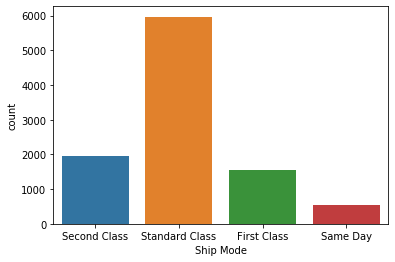

In [23]:
sns.countplot(x = 'Ship Mode' , data = ss_data)

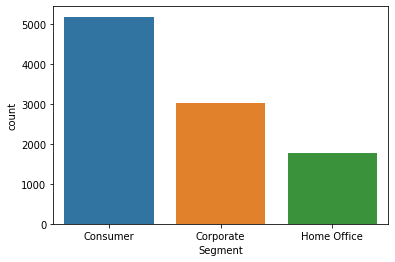

In [24]:
sns.countplot(x = 'Segment' , data = ss_data)

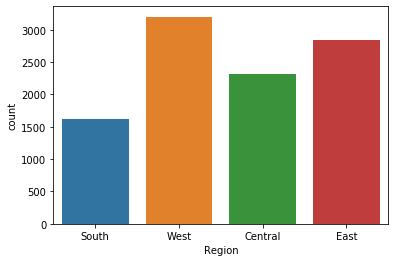

In [25]:
sns.countplot(x = 'Region' , data = ss_data)

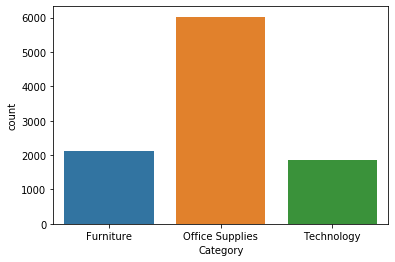

In [31]:
sns.countplot(x = 'Category' , data = ss_data)

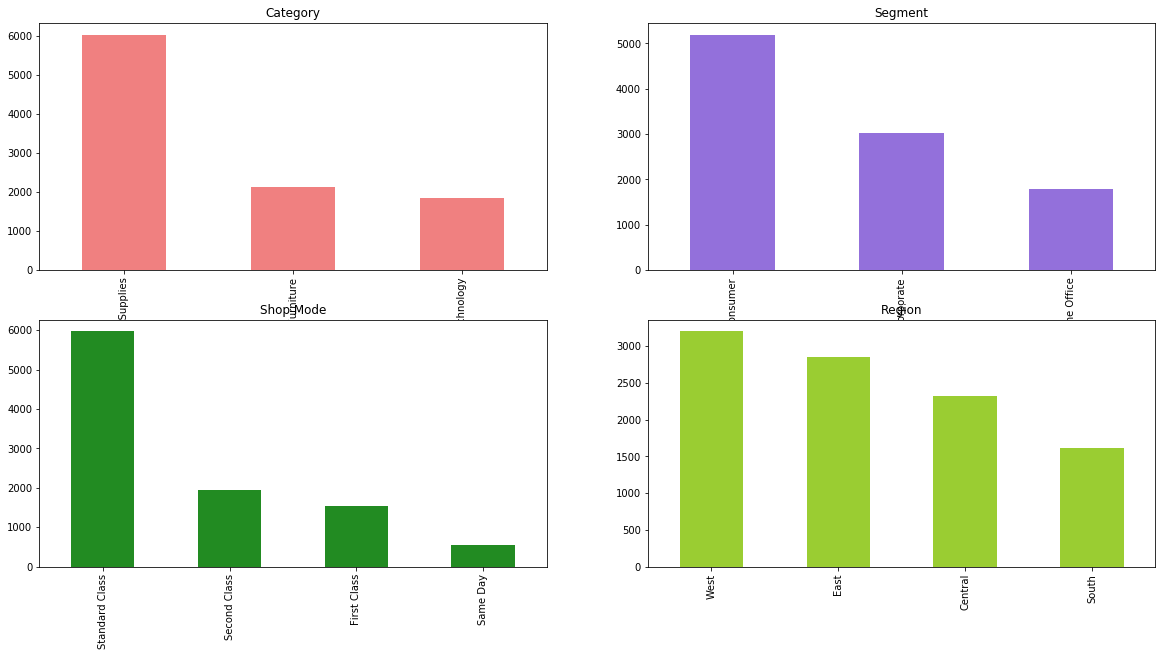

In [19]:
plt.figure(1)
plt.subplot(221)
ss_data['Category'].value_counts().plot.bar(figsize=(20,10), color='lightcoral', title='Category')
plt.subplot(222)
ss_data['Segment'].value_counts().plot.bar(color='mediumpurple', title='Segment')
plt.subplot(223)
ss_data['Ship Mode'].value_counts().plot.bar(color='forestgreen', title='Shop Mode')
plt.subplot(224)
ss_data['Region'].value_counts().plot.bar(color='yellowgreen', title='Region')

plt.show()

**It can be inferred from the above count plots that:**

- Office Supplies Sales are majority in the Category
- Consumers consist as majority in the segment
- Majority prefer the Standrd Class as the Mode of Shipping
- Maximum sales is from the West region

##### Bivariate Analysis

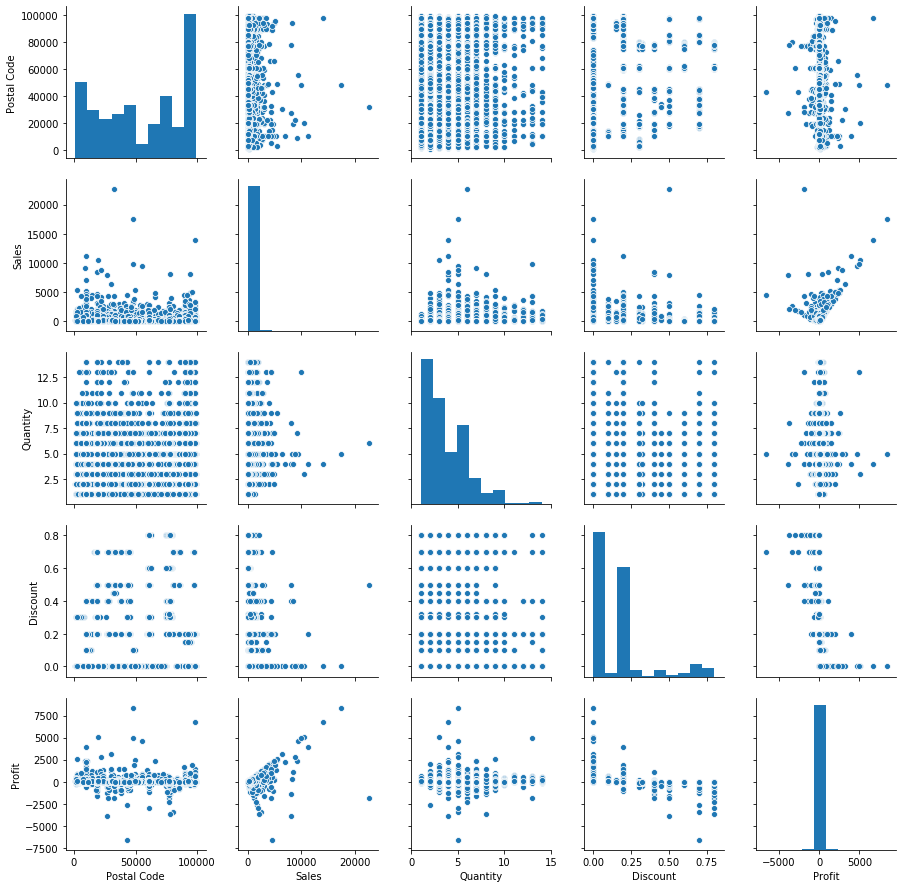

In [26]:
# Plotting a pairplot among all the variables
sns.pairplot(ss_data)
plt.show()

##### Correlation

In [28]:
ss_data.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


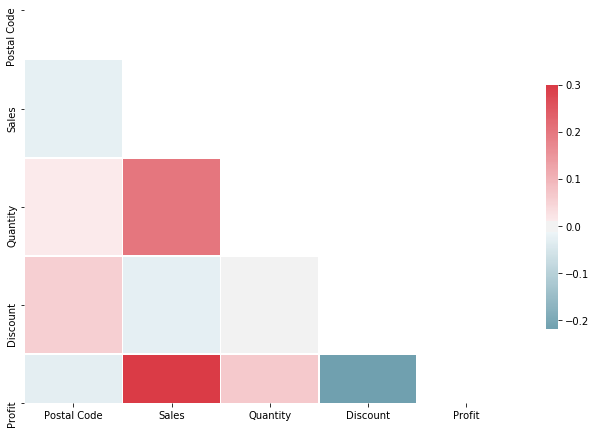

In [29]:
# Let us get the correlation in the data

# Compute the correlation matrix
corr = ss_data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

**We infer from the above correlation heat map that:**
- Profit is positively correlated with Sales (.47) and Quantity(.06). 
- Sales dominates Quantity as a factor
- Profit is negatively correlated with Discount offered.

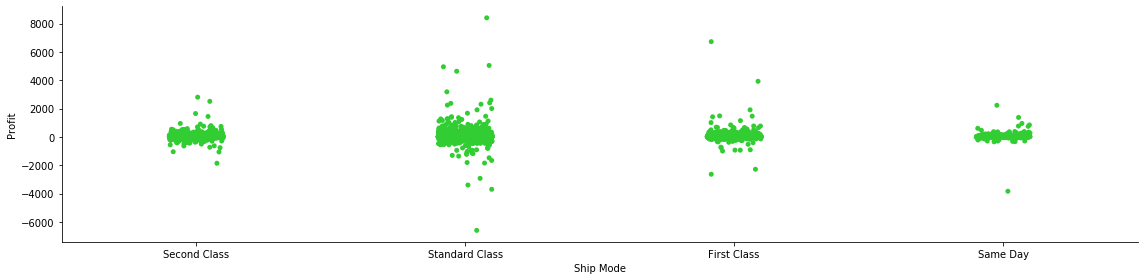

In [34]:
sns.catplot(x ="Ship Mode", y="Profit", data = ss_data, color='limegreen', height=4, aspect=4);


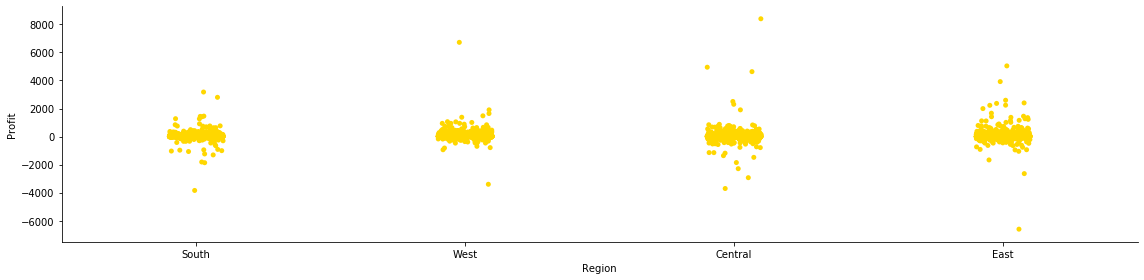

In [36]:
sns.catplot(x ="Region", y="Profit", data = ss_data, color ='gold', height=4, aspect=4);


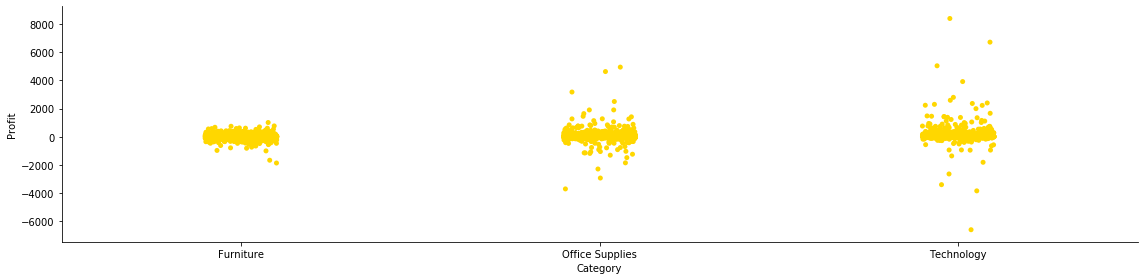

In [37]:
sns.catplot(x ="Category", y="Profit", data = ss_data, color ='gold', height=4, aspect=4);


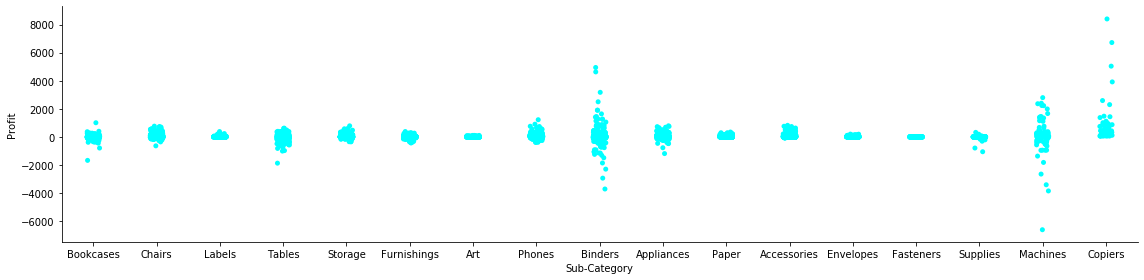

In [30]:
sns.catplot(x ="Sub-Category", y="Profit", data = ss_data, color='cyan', height=4, aspect=4);


**We infer from the Catplot that:**
- The Standard ship Mode is the most profitable one
- The technology category is the most profitable
- The East Region seems more profitable out of the other regions
- The Binders from the Sub Category are the most profitable items to be sold